In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,multilabel_confusion_matrix,classification_report
from IPython.display import display
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
iris_df["target"] = iris.target
iris_df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [4]:
iris_df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

<AxesSubplot:>

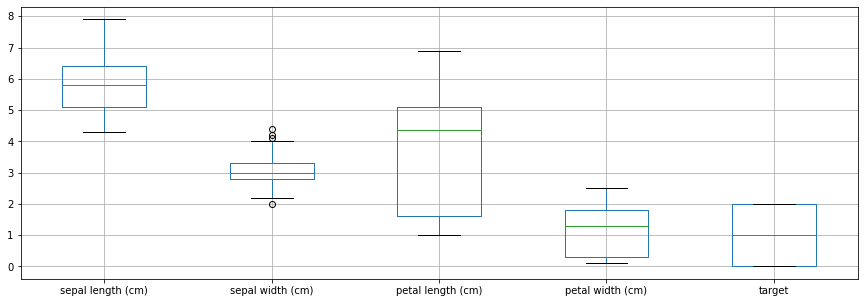

In [5]:
iris_df.boxplot(figsize=(15,5))

In [6]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [7]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [8]:
outliers = []
def get_outliers(data):
    threshold = 3
    mean = np.mean(data)
    std  = np.std(data)
    for i in data:
        z_score = (i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return outliers

In [9]:
get_outliers(iris_df["sepal width (cm)"])

[4.4]

### outlier handling

In [10]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [11]:
q1 = 2.800000
q3 = 3.300000
iqr = q3 - q1
upper_tail = q3 + (1.5*iqr)
lower_tail = q1 - (1.5*iqr)

In [12]:
np.where((iris_df["sepal width (cm)"] > upper_tail) | (iris_df["sepal width (cm)"] < lower_tail))

(array([15, 32, 33, 60]),)

In [13]:
mean = iris_df["sepal width (cm)"].loc[(iris_df['sepal width (cm)']<=upper_tail) & (iris_df["sepal width (cm)"]>=lower_tail)].mean()

In [14]:
iris_df['sepal width (cm)'] = np.where(((iris_df["sepal width (cm)"] > upper_tail) | (iris_df["sepal width (cm)"] < lower_tail)),mean,iris_df['sepal width (cm)'])

<AxesSubplot:>

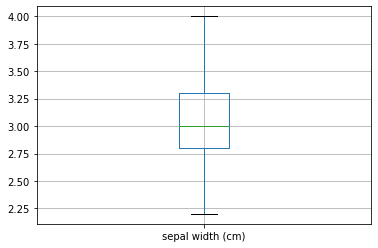

In [15]:
iris_df[['sepal width (cm)']].boxplot()

<AxesSubplot:>

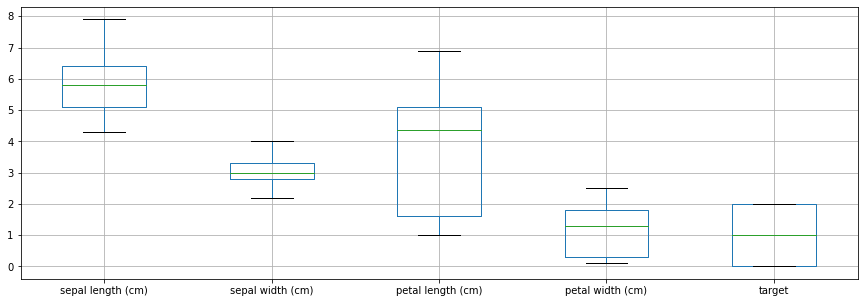

In [16]:
iris_df.boxplot(figsize=(15,5))

<AxesSubplot:xlabel='sepal width (cm)'>

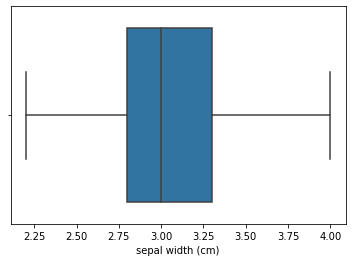

In [17]:
sns.boxplot(iris_df['sepal width (cm)'])

## train test split

In [18]:
x = iris_df.drop('target',axis=1)
y = iris_df['target']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=45)

## model training

In [19]:
logistic_lr = LogisticRegression(multi_class='ovr')
logistic_lr.fit(x_train,y_train)

LogisticRegression(multi_class='ovr')

In [20]:
# training
y_pred_train = logistic_lr.predict(x_train)
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print('confusion matrix\n',cnf_matrix)
print('*'*30)
mul_cnf_matrix = multilabel_confusion_matrix(y_train,y_pred_train)
print("Multilabel confusion matrix \n",mul_cnf_matrix)
print('*'*30)
accuracy = accuracy_score(y_train,y_pred_train)
print('Accuracy : ',accuracy)
classification_report = classification_report(y_train,y_pred_train)
print('classifiaction report : \n',classification_report)

confusion matrix
 [[39  0  0]
 [ 0 39  4]
 [ 0  2 36]]
******************************
Multilabel confusion matrix 
 [[[81  0]
  [ 0 39]]

 [[75  2]
  [ 4 39]]

 [[78  4]
  [ 2 36]]]
******************************
Accuracy :  0.95
classifiaction report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.95      0.91      0.93        43
           2       0.90      0.95      0.92        38

    accuracy                           0.95       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120



In [21]:
# testing
y_pred_test = logistic_lr.predict(x_test)
cnf_matrix = confusion_matrix(y_test,y_pred_test)
print('confusion matrix\n',cnf_matrix)
print('*'*30)
mul_cnf_matrix = multilabel_confusion_matrix(y_test,y_pred_test)
print("Multilabel confusion matrix \n",mul_cnf_matrix)
print('*'*30)
accuracy = accuracy_score(y_test,y_pred_test)
print('Accuracy : ',accuracy)
# classification_report = classification_report(y_test,y_pred_test)
print('classifiaction report : \n',classification_report)

confusion matrix
 [[11  0  0]
 [ 0  6  1]
 [ 0  1 11]]
******************************
Multilabel confusion matrix 
 [[[19  0]
  [ 0 11]]

 [[22  1]
  [ 1  6]]

 [[17  1]
  [ 1 11]]]
******************************
Accuracy :  0.9333333333333333
classifiaction report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.95      0.91      0.93        43
           2       0.90      0.95      0.92        38

    accuracy                           0.95       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120



In [22]:
import pickle
import json

In [31]:
list(iris_df.columns)

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)',
 'target']

In [30]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [32]:
data = {'columns':list(x_train.columns)}

In [33]:
with open('logistic_model.pkl','wb') as file:
    pickle.dump(logistic_lr,file)
with open('data.json','w') as file1:
    json.dump(data,file1)